# **Titanic Classification**

## **Introduction:**

### "The Titanic," a story of a ship we have all heard about, was a marvel of industry famously dubbed the "unsinkable ship." However, its eventual fate turned out to be tragically the opposite. For the 1502 passengers aboard, what was supposed to be a voyage became their final journey to an inevitable fate—death—in the middle of a freezing ocean. Despite investigations concluding that the sinking was an accident, lingering questions persist in our minds: Why did certain passengers perish while others survived? Was it purely random chance, or were there underlying factors at play? These are the questions we will explore in this notebook. Let's begin our journey!

## **Abstract:**


## **1- Data Preprocessing:**

In [20]:
#Load necessary laberaries
import pandas as pd
#Loading dataset ( train and test)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Checking for missing values or duplicates:

In [21]:
# Check for missing values
print(train_data.isnull().sum())

# Check for duplicate rows
duplicate_rows = train_data[train_data.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicate rows: 0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


### We notice that the columns : "Age" , "Cabin", "Embarked" have null values, we will handle this issue as follows:
### For **"Embarked"** column we only notice 2 missing values for it which is a low number that won't affect much so we simply **fill it with the most common port of embarkation**
### As for **"Age"** and **"Cabin"** we will handle them as follows:
### **-Taking the median for "age" and fill missing values of it.**

### **-Dropping "Cabin" column due to the big number of missing values.**

In [22]:
# Fill missing values in 'Embarked' with the most common value
#train
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)
#test
most_common_embarked = test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Fill missing values in 'Age' with the median
#train
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
#test
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Drop 'Cabin' column
#train
train_data.drop('Cabin', axis=1, inplace=True)
#test
test_data.drop('Cabin', axis=1, inplace=True)

## **Features engineering:**
### Convert categorical features to numerical and create new features and drop unnecessary ones:


In [24]:
# Convert 'Sex' to numerical
#train
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
#test
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical
#train
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
#test
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a new feature 'FamilySize'
#train
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
#test
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
# Drop unnecessary columns
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# **2-Data Analysis:**
## **Exploratory Data Analysis (EDA)**

### We will be Using visualization to understand which features contribute to survival:

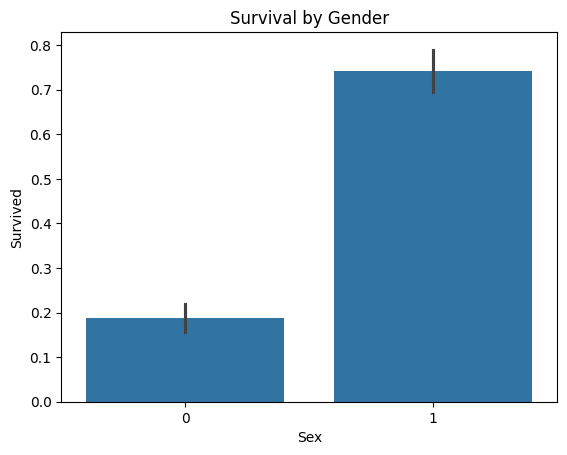

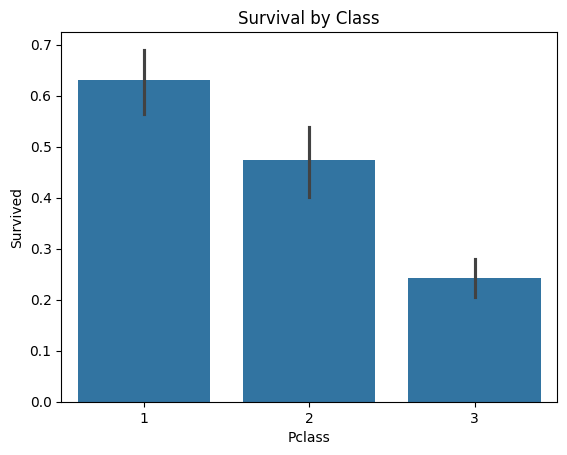

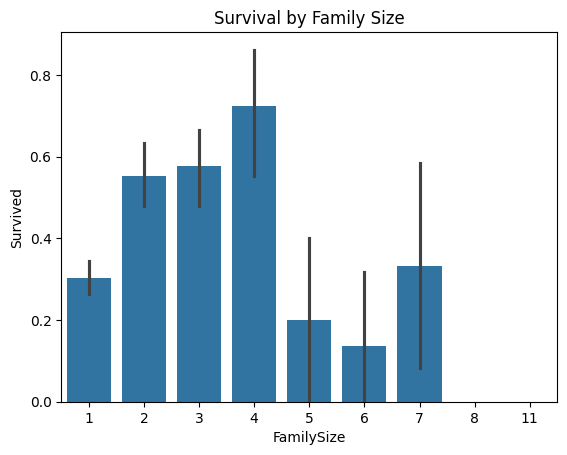

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival by Gender')
plt.show()

# Plot survival by class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival by Class')
plt.show()

# Plot survival by family size
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival by Family Size')
plt.show()

## **Interpreting the Plots:**
**1-Survival by Gender:**

Typically, we observe that **females** have a **higher survival rate** compared to males, which can be attributed to the **"women and children first"** evacuation policy.

**2-Survival by Class:**

Passengers in **1st class** often have a higher survival rate compared to those in **2nd** and **3rd class**, suggesting socio-economic status played a role in survival.

**3-Survival by Family Size:**

A **small** to **moderate** family size might have a higher survival rate, while very large families may have had lower chances of survival, possibly due to difficulty in coordinating during evacuation.

## **Additional EDA:**
### To gain further insights:

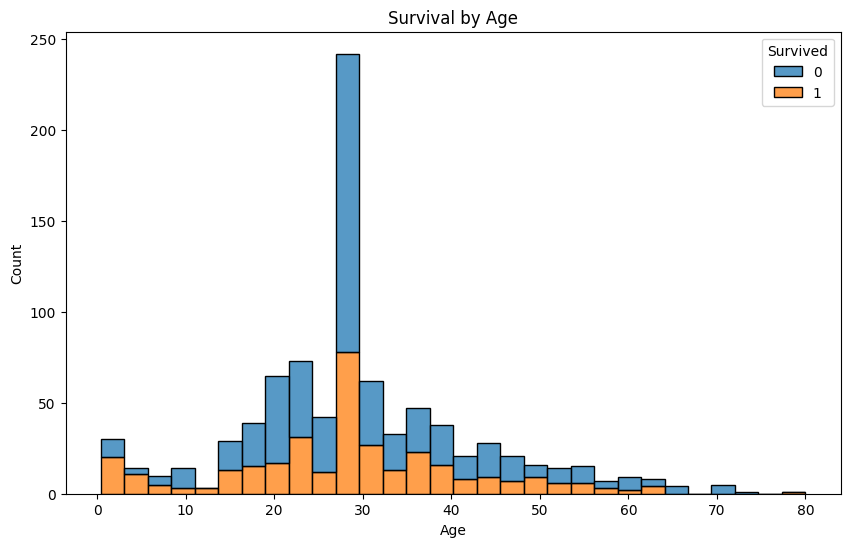

In [26]:
# Plot survival by age
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Survival by Age:**

**Observation:** Children and young adults generally have higher survival rates, with some variation across different age groups.

**Interpretation**: The "women and children first" policy likely contributed to the higher survival rate among younger passengers.

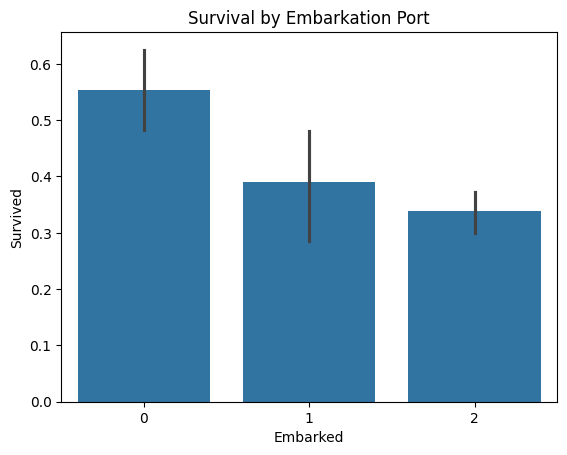

In [27]:
# Plot survival by embarkation port
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival by Embarkation Port')
plt.show()

** Survival by Embarkation Port**

**Observation:** The survival rates may vary slightly based on the port of embarkation, with passengers embarking from certain ports (e.g., Cherbourg) showing higher survival rates.

**Interpretation:** Differences in survival rates by embarkation port might be influenced by the composition of passengers (e.g., socio-economic status) boarding from those port

### **Correlation Heatmap:**

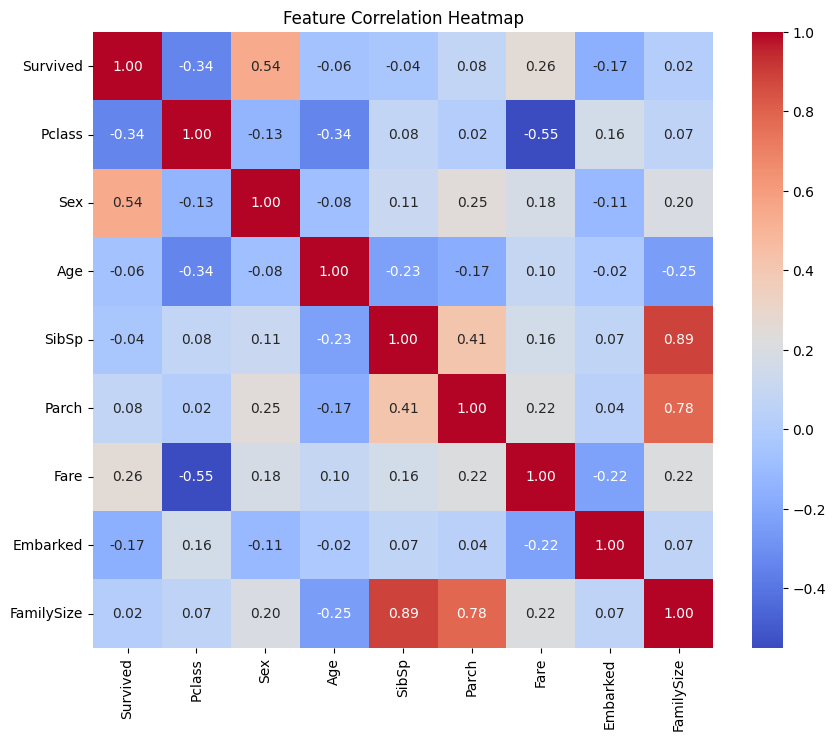

In [28]:
# Heatmap to show correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

-The Hitmap shows a strong correlation between "**survived**" and "**Sex**" as mentioned before which enforces that the "Sex" column played a crucial role in survival rate.

-The correlation between **SibSp** (siblings/spouses aboard) and **FamilySize**, as well as **Parch** (parents/children aboard) and** FamilySize**, is expected because **FamilySize is derived from SibSp and Parch**.

# **3-Model Building and Training:**
## For this classification tasks, we will start with several basic models and choose best one that fits the data

**1. Separate Features and Target:**

In [34]:
# Separate features and target variable in the training data
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Separate features in the test data
X_test = test_data.drop('Survived', axis=1, errors='ignore')
y_test = test_data['Survived'] if 'Survived' in test_data.columns else None

**2-Checking for missing values in test data:**

In [35]:
print(X_test.isna().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
FamilySize     0
dtype: int64


We notice one missing value in "Fare" column, we will handle it using the median.

In [37]:
# Fill missing values in 'Fare' column with the median from the training data
median_fare = X_train['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

Checking if missing value is gone and indeed it did:

In [38]:
print(X_test['Fare'].isna().sum())

0


**2. Train and Evaluate Models:**

we will be using :
* Logistic Regression,
* Decision Tree,
* Random Forest,
* Support Vector Machine.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Ensure that X_train and X_test have the same features
common_cols = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_cols]
X_test = X_test[common_cols]

# Split the training data into a training set and a validation set
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_split, y_train_split)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f'{name} Metrics:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  Precision: {precision:.2f}')
    print(f'  Recall: {recall:.2f}')
    print(f'  F1 Score: {f1:.2f}')




Logistic Regression Metrics:
  Accuracy: 0.81
  Precision: 0.79
  Recall: 0.74
  F1 Score: 0.76
Decision Tree Metrics:
  Accuracy: 0.77
  Precision: 0.70
  Recall: 0.77
  F1 Score: 0.74
Random Forest Metrics:
  Accuracy: 0.81
  Precision: 0.78
  Recall: 0.76
  F1 Score: 0.77
Support Vector Machine Metrics:
  Accuracy: 0.67
  Precision: 0.78
  Recall: 0.28
  F1 Score: 0.42


# **Model Performance Summary:**
## **Logistic Regression:**

**Accuracy**: 0.81: Indicates that 81% of the predictions were correct.

**Precision**: 0.79: Of the instances predicted as positive, 79% were actually positive.

**Recall**: 0.74: Of the actual positive instances, 74% were correctly identified.

**F1 Score**: 0.76: A balanced metric that considers both precision and recall. A good score indicating a good balance between precision and recall.

## **Decision Tree**

**Accuracy:** 0.77: 77% of the predictions were correct.

**Precision**: 0.70: Of the instances predicted as positive, 70% were actually positive.

**Recall**: 0.77: Of the actual positive instances, 77% were correctly identified.

**F1 Score:** 0.74: A decent balance between precision and recall, similar to Logistic Regression but slightly lower.

## **Random Forest**

**Accuracy:** 0.81: Matches Logistic Regression in accuracy at 81%.

**Precision**: 0.78: Slightly better than Logistic Regression, indicating fewer false positives.

**Recall**: 0.76: Slightly better than Logistic Regression, indicating better detection of actual positives.

**F1 Score**:  0.77: Best among all models, showing the best balance between precision and recall.

## **Support Vector Machine**

**Accuracy:** 0.67: Lower than other models, only 67% of predictions were correct.

**Precision**: 0.78: High precision, indicating a lower rate of false positives.

**Recall**: 0.28: Very low recall, meaning the model missed a significant number of positive instances.

**F1 Score**: 0.42: The lowest F1 score, indicating poor overall performance due to low recall.

# **Interpretation**
**Random Forest** and **Logistic Regression** both have **high accuracy** and a good balance between precision and recall, **making them strong candidates**.

**Decision Tree** performs **slightly worse** overall but might still be a viable option depending on other factors like interpretability and computational efficiency.
**Support Vector Machine (SVM)** shows high precision but very low recall, which suggests it is **not effectively capturing the positive instances** in the dataset. This model might not be the best choice for this task.

# **4-Passenger Survival Prediction Using Random Forest: User Input Interface:**

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define preprocessing function
def preprocess_input(data):
    # Map categorical values to numeric ones
    data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
    data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    # Calculate FamilySize
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    # Fill missing values
    return data.fillna({'Age': data['Age'].median(), 'Fare': data['Fare'].median()})

# Load  trained model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Function to make prediction based on user input
def predict_survival(inputs):
    # Convert input to DataFrame
    df = pd.DataFrame([inputs])
    df = preprocess_input(df)
    prediction = model.predict(df)
    return "Survived" if prediction[0] == 1 else "Not Survived"

# Example usage
user_input = {
    'Pclass': int(input("Enter Passenger Class (1, 2, or 3): ")),
    'Sex': input("Enter Sex (male/female): ").lower(),
    'Age': float(input("Enter Age: ")),
    'SibSp': int(input("Enter Number of Siblings/Spouses Aboard: ")),
    'Parch': int(input("Enter Number of Parents/Children Aboard: ")),
    'Fare': float(input("Enter Fare: ")),
    'Embarked': input("Enter Embarked Port (C, Q, S): ").upper()
}

print("Prediction:", predict_survival(user_input))



Enter Passenger Class (1, 2, or 3): 2
Enter Sex (male/female): female
Enter Age: 21
Enter Number of Siblings/Spouses Aboard: 5
Enter Number of Parents/Children Aboard: 2
Enter Fare: 20
Enter Embarked Port (C, Q, S): S
Prediction: Not Survived
